In [48]:
import sys, os
import xarray as xr
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
from scipy import stats

sys.path.append('/home/jbk/projects/climate/tropics/src/PhenoloPy/scripts')
import phenolopy

In [2]:

# create times
dates=pd.date_range(start='2017-01-01', periods=25, freq='15D')
dates=dates.union(pd.date_range(start='2018-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2019-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2020-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2021-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2022-01-01', periods=25, freq='15D'))
dates

DatetimeIndex(['2017-01-01', '2017-01-16', '2017-01-31', '2017-02-15',
               '2017-03-02', '2017-03-17', '2017-04-01', '2017-04-16',
               '2017-05-01', '2017-05-16',
               ...
               '2022-08-14', '2022-08-29', '2022-09-13', '2022-09-28',
               '2022-10-13', '2022-10-28', '2022-11-12', '2022-11-27',
               '2022-12-12', '2022-12-27'],
              dtype='datetime64[ns]', length=150, freq=None)

In [161]:
# read the ascii version of ndre that has 2017-2022 data for each point
ndre_data = pd.read_csv("/home/jbk/projects/climate/tropics/costa_rica_panama/ndre/panama_2017-2022.interp.coords.head20", header=None, delimiter=" ")
ndre_data.iloc[0][2:].values
ndre_data

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,-82.869495,9.656799,0.635249,0.648085,0.614445,0.606435,0.613611,0.595263,0.601864,0.608464,...,0.528989,0.577148,0.625153,0.631188,0.628161,0.645666,0.643968,0.651888,0.647939,0.638541
1,-82.869315,9.656799,0.646262,0.620039,0.606600,0.593160,0.599712,0.589027,0.596123,0.603218,...,0.537047,0.582142,0.625274,0.631219,0.641375,0.651531,0.662724,0.648980,0.672491,0.657753
2,-82.869136,9.656799,0.601536,0.587491,0.578151,0.568810,0.588703,0.560433,0.574569,0.588705,...,0.547839,0.588921,0.602938,0.607144,0.604240,0.617241,0.621475,0.613413,0.616473,0.613930
3,-82.868956,9.656799,0.609384,0.612384,0.612227,0.608375,0.583095,0.573112,0.579060,0.585007,...,0.559826,0.593276,0.605328,0.620021,0.629860,0.626075,0.604664,0.592788,0.592788,0.592788
4,-82.868776,9.656799,0.630633,0.614516,0.606165,0.597814,0.601889,0.568287,0.577909,0.587531,...,0.554665,0.591245,0.607484,0.613079,0.607986,0.620221,0.622226,0.623206,0.632011,0.632393
5,-82.868597,9.656799,0.630487,0.591257,0.578265,0.565273,0.582738,0.560795,0.574553,0.588311,...,0.538865,0.583558,0.614069,0.621898,0.622595,0.641772,0.645388,0.646487,0.643221,0.639689
6,-82.868417,9.656799,0.624156,0.618943,0.616601,0.613733,0.560161,0.584240,0.583444,0.582649,...,0.496664,0.529906,0.563147,0.607642,0.629380,0.628037,0.623285,0.636290,0.645238,0.625675
7,-82.868237,9.656799,0.579102,0.582217,0.578339,0.565799,0.580569,0.521522,0.410673,0.514040,...,0.474589,0.506921,0.539253,0.571585,0.585558,0.603342,0.590018,0.617338,0.583361,0.593031
8,-82.868058,9.656799,0.561407,0.553342,0.545276,0.537211,0.583801,0.541893,0.390223,0.508716,...,0.533554,0.585687,0.616263,0.628629,0.628692,0.625682,0.605385,0.585603,0.585603,0.585603
9,-82.867878,9.656799,0.572630,0.578738,0.584846,0.601201,0.581938,0.555619,0.373299,0.486547,...,0.491858,0.530485,0.563895,0.613716,0.615885,0.616493,0.579775,0.554305,0.554305,0.554305


In [162]:
ndre = pd.DataFrame({
               'ndre': ndre_data.iloc[0][2:].values,
                'date': dates
            })
#ndre = 
ndre.set_index('date', inplace=True)
#ndre

In [164]:
dayofyear = dates.dayofyear
radians = ((dayofyear/365.0)*2*np.pi).values


#def cal_polar_vector(dayofyear, radians, ndre):
#    len(radians.values)
#    print(len(ndre_data.iloc[0][2:].values))
#    ndre_data.iloc[0][2:].astype(float)#

#    # project to cartesian coordinate 
#    x_polar = ndre_data.iloc[0][2:].astype(float)*np.cos(radians.values)
#    y_polar = ndre_data.iloc[0][2:].astype(float)*np.sin(radians.values)

#    # Calculate average vector
#    x_average = np.average(x_polar)
#    y_average = np.average(y_polar)

#    # project back to polar coordinate
#    if (np.arctan2(y_average, x_average) >0):
#        av_angular_displacement = np.arctan2(y_average, x_average)
#    else:
#        av_angular_displacement = np.arctan2(y_average, x_average) + 2*np.pi
#    av_distance = np.sqrt(x_average**2 + y_average**2)
#    print("av_angular_displacement %f av_distance %f"%(av_angular_displacement, av_distance))

def deg2doy(deg):
    return deg*(365./360.)

def rad2doy(rad):
    return (rad*365.0)/(2*np.pi)

def doy2date(doy, year):
    y = pd.to_datetime(year, format = '%Y')
    td = pd.Series(int(doy)).apply(lambda x: pd.Timedelta(x, unit = 'd'))
    t =  y + td
    return t #.to_numpy()

#def date2doy(date):
    

def calc_polar_vector(dayofyear, radians, ndre):
    len(radians)
    #print(len(ndre))
    
    # project to cartesian coordinate 
    x = ndre*np.sin(radians)
    y = ndre*np.cos(radians)

    # Calculate average vector
    meanx = np.average(x)
    meany = np.average(y)

    # project back to polar coordinate and calculate angle of mean vector
    #print(np.arctan2(meanx, meany))
    if (np.arctan2(meanx, meany) >0):
        meananglerad = np.arctan2(meanx, meany)
    else:
        meananglerad = np.arctan2(meanx, meany) + 2*np.pi
    # antivector 
    if meananglerad + np.pi > 2*np.pi:
        meanantianglerad = meananglerad - np.pi
    else:
        meanantianglerad = meananglerad + np.pi
    
    # seasonality
    seasonality = np.sqrt(meanx**2 + meany**2)
    
    print("meananglerad rad %f deg %f seasonality %f meanantianglerad rad %f deg %f"%(meananglerad, np.rad2deg(meananglerad), seasonality, meanantianglerad, np.rad2deg(meanantianglerad)))
    return meananglerad, seasonality, meanantianglerad

#ndre = ndre_data.iloc[0][2+25:2+25+25].astype(float)
#doy=dayofyear[0:25]
#rad=radians[0:25]
#meananglerad, seasonality, meanantianglerad = calc_polar_vector(doy, rad, ndre)

In [173]:
#doy
#dayofyear.values
#print(date_meanantianglerad[0])
#print(date_meanantianglerad[1])

#print(doy_meananglerad[0])
#ndre
#ndre_data.iloc[0]
#ndre.loc[date_meanantianglerad[0]:date_meanantianglerad[1]]

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ecdf.html
# compute cumlative distribution function
#res = stats.ecdf(ndre.loc[date_meanantianglerad[0]:date_meanantianglerad[1]].ndre)
#print(res.cdf.quantiles)
#print(res.cdf.probabilities)
#print(res.cdf.probabilities.evaluate(0.5))
#res.iloc[(res.cdf.probabilities-0.2).abs().argsort()[:1]]
#np.absolute(res.cdf.probabilities-0.2).argmin()

def compute_phenparams(res):
    #ndre['cumsum']=np.cumsum(ndre.ndre)/np.cumsum(ndre.ndre).max()
    phen_params=[0.2,0.5,0.8, 1.0]
    #print(res)
    for p in phen_params:
        #print(f'Phen params {p} happened on {ndre.index[ ndre.iloc[(ndre.cumsum-p).abs().argsort()]]}')     
        date=res.iloc[(res['cumsum']-p).abs().argsort()[:1]].index[0]
        print(f'Phen params {p} happened on {date} DOY {date.dayofyear}')
compute_phenparams(res)
#phen_params=[0.2,0.5,0.8, 1.0]
#for p in phen_params:
#    print(f'Phen params {p} happened on {ndre.index[np.absolute(res.cdf.probabilities-p).argmin()]}')


Phen params 0.2 happened on 2021-08-29 00:00:00 DOY 241
Phen params 0.5 happened on 2021-12-27 00:00:00 DOY 361
Phen params 0.8 happened on 2022-04-16 00:00:00 DOY 106
Phen params 1.0 happened on 2022-06-30 00:00:00 DOY 181


In [175]:
res.iloc[(res['cumsum']-0.2).abs().argsort()[:1]].index
res.iloc[(res['cumsum']-0.2).abs().argsort()[:1]].index[0]
ndre_data.shape

(20, 152)

In [186]:
syear=2017
eyear=2022
meananglerad = np.zeros((eyear-syear+1))
meanantianglerad = np.zeros((eyear-syear+1))
seasonality = np.zeros((eyear-syear+1))
date_meananglerad=[]
date_meanantianglerad=[]
doy_meananglerad=[]
doy_meanantianglerad=[]

counter=0
for y in range(syear, eyear+1):
    print(f'Phenological year {y}')
    print("Year: %d [%d %d]"%(y, 2+(y-syear)*25, 2+(y-syear+2)*25))
    ndre_yr = ndre_data.iloc[0][2+(y-syear)*25:2+(y-syear+2)*25].astype(float)
    doy=dayofyear[(y-syear)*25:(y-syear+2)*25]
    rad=radians[(y-syear)*25:(y-syear+2)*25]
    
    meananglerad[counter], seasonality[counter], meanantianglerad[counter] = calc_polar_vector(doy, rad, ndre_yr)

    date_meananglerad.append(doy2date(rad2doy(meananglerad[counter]), y)[0])
    date_meanantianglerad.append(doy2date(rad2doy(meanantianglerad[counter]), y)[0])

    doy_meananglerad.append(rad2doy(meananglerad[counter]))
    doy_meanantianglerad.append(rad2doy(meanantianglerad[counter]))

    print("Date of mean vector %s"%(doy2date(rad2doy(meananglerad[counter]), y)[0]))
    print("Date of mean antivector %s"%(doy2date(rad2doy(meanantianglerad[counter]), y)[0]))
    print("###################################################\n")
    
counter=0
for y in range(syear, eyear+1):
    print(f'Phenological year {y}')
    if counter > 0:
        # subset ndre for phenological year
        res = ndre.loc[date_meanantianglerad[counter-1]:date_meanantianglerad[counter]]
        print(res)
        res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
        #print(res)
        compute_phenparams(res)
    print("--------------------------------------------------\n")
    counter=counter+1

#syear=2018
#eyear=2018

#for y in range(syear, eyear+1):
#    print("Year: %d"%(y))
#    ndre = ndre_data.iloc[0][2+(y-syear)*25:2+(y-syear+1)*25].astype(float)
#    doy=dayofyear[(y-syear)*25:(y-syear+1)*25]
#    rad=radians[(y-syear)*25:(y-syear+1)*25]
#    meananglerad, seasonality, meanantianglerad = calc_polar_vector(doy, rad, ndre)
#    print("Date of mean vector %s"%(doy2date(rad2doy(meananglerad), y)[0]))
#    print("Date of mean antivector %s"%(doy2date(rad2doy(meanantianglerad), y)[0]))

Phenological year 2017
Year: 2017 [2 52]
meananglerad rad 0.138483 deg 7.934514 seasonality 0.020894 meanantianglerad rad 3.280076 deg 187.934514
Date of mean vector 2017-01-09 00:00:00
Date of mean antivector 2017-07-10 00:00:00
###################################################

Phenological year 2018
Year: 2018 [27 77]
meananglerad rad 0.145378 deg 8.329532 seasonality 0.024257 meanantianglerad rad 3.286970 deg 188.329532
Date of mean vector 2018-01-09 00:00:00
Date of mean antivector 2018-07-10 00:00:00
###################################################

Phenological year 2019
Year: 2019 [52 102]
meananglerad rad 0.373091 deg 21.376540 seasonality 0.021412 meanantianglerad rad 3.514684 deg 201.376540
Date of mean vector 2019-01-22 00:00:00
Date of mean antivector 2019-07-24 00:00:00
###################################################

Phenological year 2020
Year: 2020 [77 127]
meananglerad rad 1.000872 deg 57.345735 seasonality 0.006003 meanantianglerad rad 4.142465 deg 237.34573

/tmp/ipykernel_2161917/3610296111.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/3610296111.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/3610296111.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [132]:
print(date_meanantianglerad[counter-1], date_meanantianglerad[counter])
#ndre.loc[date_meanantianglerad[counter-1]:date_meanantianglerad[counter]]
#ndre.loc[date_meanantianglerad[0]:date_meanantianglerad[1]]
#ndre
res
res.iloc[(res['cumsum']-0.2).abs().argsort()[:1]].index

2017-07-10 00:00:00 2018-07-24 00:00:00


DatetimeIndex(['2017-09-13'], dtype='datetime64[ns]', name='date', freq=None)

In [9]:
#np.cos(radians.values)
#np.cos(radians.values())
#radians
year=2018
print("rad %d"%(meananglerad))
print("deg %f"%((meananglerad/np.pi)*180.0))
print("rad2doy %f"%(meananglerad*365.0/(2*np.pi)))
print("deg2doy %f"%((meananglerad/np.pi)*180.0*365/360))

doy=rad2doy(meanantianglerad)
print(doy2date(doy, year))

doy=rad2doy(meananglerad)
print(doy2date(doy, year))


rad 0
deg 7.579845
rad2doy 7.685121
deg2doy 7.685121
0   2018-07-10
dtype: datetime64[ns]
0   2018-01-08
dtype: datetime64[ns]


In [317]:
ndre = ndre_data.iloc[0][2:].astype(float)

# create dataset
ds = xr.Dataset({
    'NDRE': xr.DataArray(
                data   = ndre,   # enter data here
                dims   = ['time'],
                coords = {'time': dates},
                attrs  = {
                    '_FillValue': -999.9,
                    'units'     : 'None'
                    }
                ),
        },
        attrs = {'NDRE': 'Normalized Difference Red Edge Index'}
    )

In [318]:
# calc phenometrics via phenolopy!
ds_phenos = phenolopy.calc_phenometrics(da=ds['NDRE'], 
                                        peak_metric='pos', 
                                        base_metric='vos', 
                                        method='seasonal_amplitude', 
                                        factor=0.2, 
                                        thresh_sides='two_sided', 
                                        abs_value=0.1)

Initialising calculation of phenometrics.

Beginning extraction of CRS metadata.
> Extracting CRS metadata.
> No CRS metadata found. Returning None.

Beginning calculation of phenometrics. This can take awhile - please wait.

Beginning calculation of peak of season (pos) values and times.
> Calculating peak of season (pos) values.
> Calculating peak of season (pos) times.
> Success!

Beginning calculation of valley of season (vos) values and times.
> Calculating valley of season (vos) values.
> Calculating valley of season (vos) times.
> Success!

Beginning calculation of middle of season (mos) values (times not possible).
> Calculating middle of season (mos) values.
> Success!

Beginning calculation of base (bse) values (times not possible).
> Calculating base (bse) values.
> Success!

Beginning calculation of amplitude of season (aos) values (times not possible).
> Calculating amplitude of season (aos) values.
> Success!

Beginning calculation of start of season (sos) values and time

In [319]:
ds_phenos

<xarray.Dataset>
Dimensions:      ()
Data variables: (12/18)
    pos_values   float32 0.6519
    pos_times    float32 331.0
    mos_values   float32 0.6266
    vos_values   float32 0.4241
    vos_times    float32 16.0
    bse_values   float32 0.4551
    ...           ...
    roi_values   float32 0.001425
    rod_values   float32 0.008654
    lios_values  float32 36.33
    sios_values  float32 10.89
    liot_values  float32 90.79
    siot_values  float32 27.6

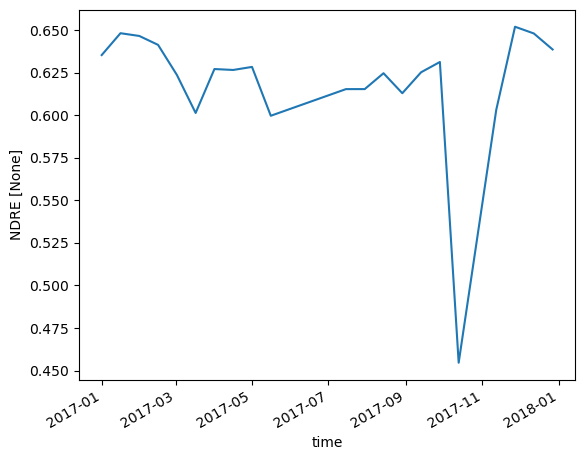

In [249]:
ds['NDRE'].plot()

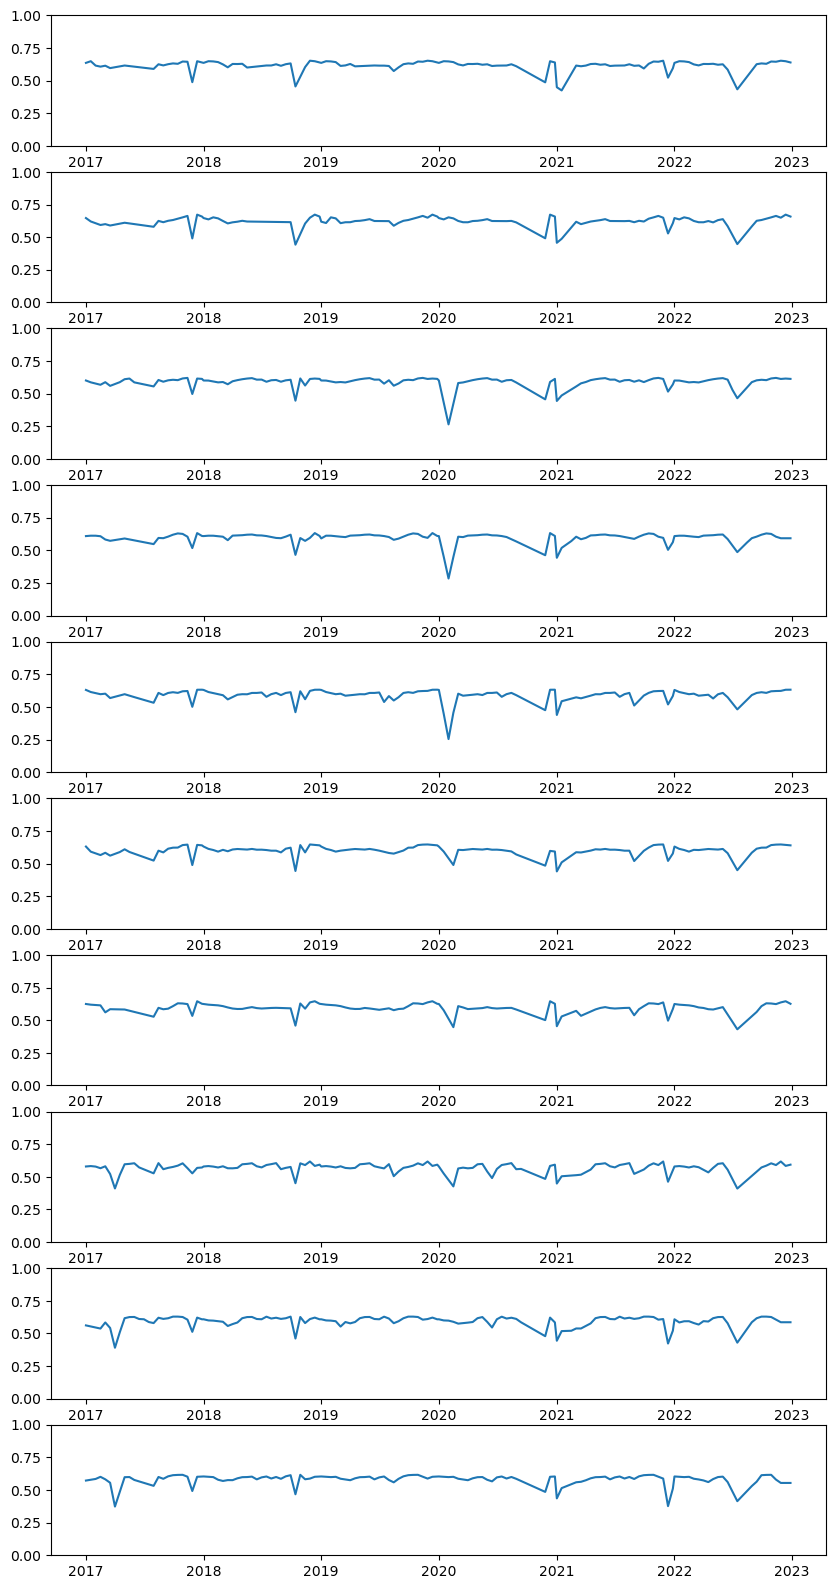

In [273]:
#ndre_data.iloc[0][2+2:2+25+25].plot()
fig, ax = plt.subplots(10,1, figsize=(10,20))

for i in range(10):
    ax[i].plot(dates, ndre_data.iloc[i][2:])
    ax[i].set_ylim([0,1])

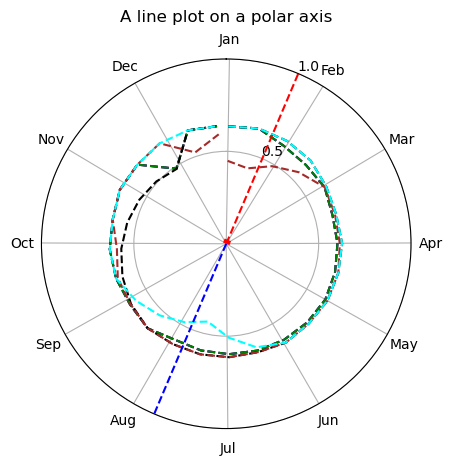

In [314]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# 2017
y=2017
ax.plot(radians[(y-2017)*25:((y-2017)+1)*25], ndre_data.iloc[0][2+(y-2017)*25:2+((y-2017)+1)*25], color='red', ls='--')
# 2018
y=2017
ax.plot(radians[(y-2017)*25:((y-2017)+1)*25], ndre_data.iloc[0][2+(y-2017)*25:2+((y-2017)+1)*25], color='blue', ls='--')
# 2019
y=2017
ax.plot(radians[(y-2017)*25:((y-2017)+1)*25], ndre_data.iloc[0][2+(y-2017)*25:2+((y-2017)+1)*25], color='green', ls='--')
# 2020
y=2020
ax.plot(radians[(y-2017)*25:((y-2017)+1)*25], ndre_data.iloc[0][2+(y-2017)*25:2+((y-2017)+1)*25], color='black', ls='--')
# 2021
y=2021
ax.plot(radians[(y-2017)*25:((y-2017)+1)*25], ndre_data.iloc[0][2+(y-2017)*25:2+((y-2017)+1)*25], color='brown', ls='--')
# 2022
y=2022
ax.plot(radians[(y-2017)*25:((y-2017)+1)*25], ndre_data.iloc[0][2+(y-2017)*25:2+((y-2017)+1)*25], color='cyan', ls='--')

ax.plot(meananglerad, seasonality, color='#ee8d18', lw=10, ls='--')

ax.vlines(meananglerad, 0, 1, colors='red', ls='--') #, zorder=3)
ax.vlines(meanantianglerad, 0, 1, colors='blue', ls='--') #, zorder=3)

ax.vlines(meananglerad, 0, seasonality, colors='red', lw=5) #, zorder=3)

ax.set_rmax(1)
ax.set_rticks([0.5, 1]) #, 1.5, 2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted+(y-2017)*25 line
ax.grid(True)

#plt.arrow(0, 0, meananglerad, 1, alpha=1.0, width = 0.1,
#                 edgecolor = 'black', facecolor = 'green', lw = 2) #, zorder = 5)

ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

ax.set_title("A line plot on a polar axis", va='bottom')
# set the locations and labels of the angular gridlines
lines, labels = ax.set_thetagrids( tickdeg, ('Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec') )
plt.show()

array([0.01721421, 0.2754273 , 0.5336404 , 0.79185349, 1.05006659,
       1.30827968, 1.56649278, 1.82470587, 2.08291896, 2.34113206,
       2.59934515, 2.85755825, 3.11577134, 3.37398444, 3.63219753,
       3.89041063, 4.14862372, 4.40683682, 4.66504991, 4.92326301,
       5.1814761 , 5.4396892 , 5.69790229, 5.95611539, 6.21432848])

range(0, 360, 30)


In [165]:
tickdates=pd.date_range(start='2017-01-01', periods=12, freq='1m')-pd.offsets.MonthBegin(1)#.dayofyear
tickdoy = tickdates.dayofyear
tickdeg = np.rad2deg((tickdoy/365.0)*2*np.pi)
print(tickdeg)
print((tickdoy/365.0)*2*np.pi)

Index([0.9863013698630136, 31.561643835616437,  59.17808219178081,
        89.75342465753424, 119.34246575342466, 149.91780821917808,
       179.50684931506848, 210.08219178082192, 240.65753424657532,
       270.24657534246575,  300.8219178082192,  330.4109589041096],
      dtype='float64')
Index([0.01721420632103996,  0.5508546022732788,  1.0328523792623976,
        1.5664927752146365,  2.0829189648458355,   2.616559360798074,
         3.132985550429273,   3.666625946381512,   4.200266342333751,
        4.7166925319649495,   5.250332927917189,   5.766759117548387],
      dtype='float64')


In [137]:
syear=2017
eyear=2022
meananglerad = np.zeros((eyear-syear+1))
meanantianglerad = np.zeros((eyear-syear+1))
seasonality = np.zeros((eyear-syear+1))
date_meananglerad=[]
date_meanantianglerad=[]
doy_meananglerad=[]
doy_meanantianglerad=[]

counter=0
for y in range(syear, eyear+1):
    print("Year: %d"%(y))
    ndre_yr = ndre_data.iloc[0][2+(y-syear)*25:2+(y-syear+1)*50].astype(float)
    doy=dayofyear[(y-syear)*25:(y-syear+1)*50]
    rad=radians[(y-syear)*25:(y-syear+1)*50]
    
    meananglerad[counter], seasonality[counter], meanantianglerad[counter] = calc_polar_vector(doy, rad, ndre_yr)

    date_meananglerad.append(doy2date(rad2doy(meananglerad[counter]), y)[0])
    date_meanantianglerad.append(doy2date(rad2doy(meanantianglerad[counter]), y)[0])

    doy_meananglerad.append(rad2doy(meananglerad[counter]))
    doy_meanantianglerad.append(rad2doy(meanantianglerad[counter]))

    print("Date of mean vector %s"%(doy2date(rad2doy(meananglerad[counter]), y)[0]))
    print("Date of mean antivector %s"%(doy2date(rad2doy(meanantianglerad[counter]), y)[0]))
    print("###################################################\n")
    
counter=0
for y in range(syear, eyear+1):
    if counter > 0:
        # subset ndre for phenological year
        res = ndre.loc[date_meanantianglerad[counter-1]:date_meanantianglerad[counter]]
        res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
        compute_phenparams(res)
    print("--------------------------------------------------\n")
    counter=counter+1

#syear=2018
#eyear=2018

#for y in range(syear, eyear+1):
#    print("Year: %d"%(y))
#    ndre = ndre_data.iloc[0][2+(y-syear)*25:2+(y-syear+1)*25].astype(float)
#    doy=dayofyear[(y-syear)*25:(y-syear+1)*25]
#    rad=radians[(y-syear)*25:(y-syear+1)*25]
#    meananglerad, seasonality, meanantianglerad = calc_polar_vector(doy, rad, ndre)
#    print("Date of mean vector %s"%(doy2date(rad2doy(meananglerad), y)[0]))
#    print("Date of mean antivector %s"%(doy2date(rad2doy(meanantianglerad), y)[0]))

150

In [313]:
def calc_polar_vector(dayofyear, radians, ndre):
    len(radians)
    #print(len(ndre))
    
    # project to cartesian coordinate 
    x = ndre.ndre.values*np.sin(radians)
    y = ndre.ndre.values*np.cos(radians)

    # Calculate average vector
    meanx = np.average(x)
    meany = np.average(y)

    # project back to polar coordinate and calculate angle of mean vector
    #print(np.arctan2(meanx, meany))
    if (np.arctan2(meanx, meany) >0):
        meananglerad = np.arctan2(meanx, meany)
    else:
        meananglerad = np.arctan2(meanx, meany) + 2*np.pi
    # antivector 
    if meananglerad + np.pi > 2*np.pi:
        meanantianglerad = meananglerad - np.pi
    else:
        meanantianglerad = meananglerad + np.pi
    
    # seasonality
    seasonality = np.sqrt(meanx**2 + meany**2)
    
    print("meananglerad rad %f deg %f seasonality %f meanantianglerad rad %f deg %f"%(meananglerad, np.rad2deg(meananglerad), seasonality, meanantianglerad, np.rad2deg(meanantianglerad)))
    return meananglerad, seasonality, meanantianglerad


def compute_phenparams(res):
    #ndre['cumsum']=np.cumsum(ndre.ndre)/np.cumsum(ndre.ndre).max()
    phen_params=[0.2,0.5,0.8, 1.0]
    phen_params_dayssince=[]
    #print(res)
    for p in phen_params:
        #print(f'Phen params {p} happened on {ndre.index[ ndre.iloc[(ndre.cumsum-p).abs().argsort()]]}')     
        date=res.iloc[(res['cumsum']-p).abs().argsort()[:1]].index[0]
        print(date.date())
        #phen_params_dates.append(date.date())
        
        dayssince=(date - pd.to_datetime(['2017-1-1'])).days[0]
        phen_params_dayssince.append(dayssince)
        print(f'Phen params {p} happened on {date.date()} DOY {date.dayofyear} DOY since 2017-01-01 {dayssince}')
        #((date - pd.to_datetime(['2017-1-1'])).days[0])
    return phen_params_dayssince

def calc_phenometrics(ndre):
    syear=2017
    eyear=2022
    meananglerad = np.zeros((eyear-syear+1))
    meanantianglerad = np.zeros((eyear-syear+1))
    seasonality = np.zeros((eyear-syear+1))
    date_meananglerad=[]
    date_meanantianglerad=[]
    doy_meananglerad=[]
    doy_meanantianglerad=[]

    counter=0
    for y in range(syear, eyear+1):
        print(f'Phenological year {y}')
        #print("Year: %d [%d %d]"%(y, 2+(y-syear)*25, 2+(y-syear+2)*25))
        ndre_yr = ndre[(y-syear)*25:(y-syear+2)*25].astype(float)
        doy=dayofyear[(y-syear)*25:(y-syear+2)*25]
        rad=radians[(y-syear)*25:(y-syear+2)*25]
        #print(ndre_yr)
        meananglerad[counter], seasonality[counter], meanantianglerad[counter] = calc_polar_vector(doy, rad, ndre_yr)

        date_meananglerad.append(doy2date(rad2doy(meananglerad[counter]), y)[0])
        date_meanantianglerad.append(doy2date(rad2doy(meanantianglerad[counter]), y)[0])

        doy_meananglerad.append(rad2doy(meananglerad[counter]))
        doy_meanantianglerad.append(rad2doy(meanantianglerad[counter]))

        #print("counter %d yeay %d Strength of seasonality %f"%(counter, y, seasonality[counter]))
        #print("Date of mean vector %s"%(doy2date(rad2doy(meananglerad[counter]), y)[0]))
        #print("Date of mean antivector %s"%(doy2date(rad2doy(meanantianglerad[counter]), y)[0]))
        #print("###################################################\n")
        counter=counter + 1 
        
    #print("seasonality")
    #print(seasonality)
    
    counter=0
    phen_params_all=[]
    for y in range(syear, eyear+1):
        
        print("--------------------------------------------------")
        print(f'Phenological year {y}')
        if counter > 0:
            phen_params_all.append(seasonality[counter])
            # subset ndre for phenological year
            res = ndre.loc[date_meanantianglerad[counter-1]:date_meanantianglerad[counter]]
            #print(res)
            #print(res.ndre)
            res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
            #print(res)
            phen_params_dayssince = compute_phenparams(res)
            phen_params_all.extend(phen_params_dayssince)
        print("--------------------------------------------------")
        counter=counter+1
    return phen_params_all




In [314]:
#date1=pd.to_datetime(['2022-1-1'])
#date2=pd.DateTime(2017,1,1)
#(pd.to_datetime(['2022-1-1'])-pd.to_datetime(['2017-1-1'])).days[0]
#(date - pd.to_datetime(['2017-1-1'])).days[0]

In [327]:
import csv
# read the ascii version of ndre that has 2017-2022 data for each point
ndrefile = "/home/jbk/projects/climate/tropics/costa_rica_panama/ndre/panama_2017-2022.interp.coords.head20"
#while True:
#    line = ndrefile.readline()
#    calc_phenometrics(line)
count=0
outfile=open('out.phenparams', 'w')
with open(ndrefile, 'r') as f:          # Read lines separately
    reader = csv.reader(f, delimiter=' ')
    for i, line in enumerate(reader):
        print(f'Row {i}')
        coords=[]
        coords.append(float(line[0]))
        coords.append(float(line[1]))
        #print(i, line)
        line1 = pd.DataFrame({
               'ndre': np.array(line[2:], dtype=float),
                'date': dates
            })
        
        line1.set_index('date', inplace=True)
        #print(line1)
        phen_params_all = calc_phenometrics(line1)
        coords.extend(phen_params_all)
        #outfile.writelines(f'{np.asarray(coords)} \n')
        outfile.writelines(f'{str(coords)[1:-1]}\n')
outfile.close()
ndrefile.close()

Row 0
Phenological year 2017
meananglerad rad 0.138483 deg 7.934514 seasonality 0.020894 meanantianglerad rad 3.280076 deg 187.934514
Phenological year 2018
meananglerad rad 0.145378 deg 8.329532 seasonality 0.024257 meanantianglerad rad 3.286970 deg 188.329532
Phenological year 2019
meananglerad rad 0.373091 deg 21.376540 seasonality 0.021412 meanantianglerad rad 3.514684 deg 201.376540
Phenological year 2020
meananglerad rad 1.000872 deg 57.345735 seasonality 0.006003 meanantianglerad rad 4.142465 deg 237.345735
Phenological year 2021
meananglerad rad 6.247158 deg 357.935804 seasonality 0.019287 meanantianglerad rad 3.105566 deg 177.935804
Phenological year 2022
meananglerad rad 0.132293 deg 7.579845 seasonality 0.045372 meanantianglerad rad 3.273886 deg 187.579845
--------------------------------------------------
Phenological year 2017
--------------------------------------------------
--------------------------------------------------
Phenological year 2018
2017-09-13
Phen params 

/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

2020-08-13
Phen params 0.2 happened on 2020-08-13 DOY 226 DOY since 2017-01-01 1320
2020-12-11
Phen params 0.5 happened on 2020-12-11 DOY 346 DOY since 2017-01-01 1440
2021-04-01
Phen params 0.8 happened on 2021-04-01 DOY 91 DOY since 2017-01-01 1551
2021-06-15
Phen params 1.0 happened on 2021-06-15 DOY 166 DOY since 2017-01-01 1626
--------------------------------------------------
--------------------------------------------------
Phenological year 2022
2021-08-29
Phen params 0.2 happened on 2021-08-29 DOY 241 DOY since 2017-01-01 1701
2021-12-27
Phen params 0.5 happened on 2021-12-27 DOY 361 DOY since 2017-01-01 1821
2022-04-16
Phen params 0.8 happened on 2022-04-16 DOY 106 DOY since 2017-01-01 1931
2022-06-30
Phen params 1.0 happened on 2022-06-30 DOY 181 DOY since 2017-01-01 2006
--------------------------------------------------
Row 7
Phenological year 2017
meananglerad rad 6.099297 deg 349.463948 seasonality 0.015103 meanantianglerad rad 2.957704 deg 169.463948
Phenological year

/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

2018-04-01
Phen params 0.8 happened on 2018-04-01 DOY 91 DOY since 2017-01-01 455
2018-06-15
Phen params 1.0 happened on 2018-06-15 DOY 166 DOY since 2017-01-01 530
--------------------------------------------------
--------------------------------------------------
Phenological year 2019
2018-08-29
Phen params 0.2 happened on 2018-08-29 DOY 241 DOY since 2017-01-01 605
2018-12-27
Phen params 0.5 happened on 2018-12-27 DOY 361 DOY since 2017-01-01 725
2019-04-16
Phen params 0.8 happened on 2019-04-16 DOY 106 DOY since 2017-01-01 835
2019-06-30
Phen params 1.0 happened on 2019-06-30 DOY 181 DOY since 2017-01-01 910
--------------------------------------------------
--------------------------------------------------
Phenological year 2020
2019-09-13
Phen params 0.2 happened on 2019-09-13 DOY 256 DOY since 2017-01-01 985
2019-12-12
Phen params 0.5 happened on 2019-12-12 DOY 346 DOY since 2017-01-01 1075
2020-03-16
Phen params 0.8 happened on 2020-03-16 DOY 76 DOY since 2017-01-01 1170
202

/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cumsum']=np.cumsum(res.ndre)/np.cumsum(res.ndre).max()
/tmp/ipykernel_2161917/390758673.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

2021-09-28
Phen params 0.2 happened on 2021-09-28 DOY 271 DOY since 2017-01-01 1731
2022-01-16
Phen params 0.5 happened on 2022-01-16 DOY 16 DOY since 2017-01-01 1841
2022-05-01
Phen params 0.8 happened on 2022-05-01 DOY 121 DOY since 2017-01-01 1946
2022-07-15
Phen params 1.0 happened on 2022-07-15 DOY 196 DOY since 2017-01-01 2021
--------------------------------------------------
Row 17
Phenological year 2017
meananglerad rad 0.094898 deg 5.437264 seasonality 0.062729 meanantianglerad rad 3.236491 deg 185.437264
Phenological year 2018
meananglerad rad 0.190652 deg 10.923579 seasonality 0.066430 meanantianglerad rad 3.332245 deg 190.923579
Phenological year 2019
meananglerad rad 0.221053 deg 12.665383 seasonality 0.027010 meanantianglerad rad 3.362645 deg 192.665383
Phenological year 2020
meananglerad rad 0.637062 deg 36.500940 seasonality 0.029826 meanantianglerad rad 3.778654 deg 216.500940
Phenological year 2021
meananglerad rad 0.533617 deg 30.574016 seasonality 0.032823 meananti

AttributeError: 'str' object has no attribute 'close'

In [239]:
#np.array(line[2:], dtype=int)
print(line[2])

0.6352491825


In [157]:
import numpy as np
x = np.arange(20)
Percent = 25

CumSumArray = np.cumsum(x)
ValueToFind = CumSumArray[-1] * Percent / 100
Idx = np.argmax(CumSumArray > ValueToFind) #[0] - 1

In [158]:
np.argmax(CumSumArray > ValueToFind)
Idx

10